In [61]:
!pip install yfinance --upgrade --no-cache-dir
!pip install stable-baselines3 gym numpy pandas scikit-learn matplotlib
import tensorflow as tf
from tensorflow import keras

# **Importowanie bibliotek**

In [63]:
import yfinance as yf
import numpy as np
import pandas as pd

# **Wybór akcji do trenowania modelu**

In [64]:
price_AAPL = yf.download('gld', start='1990-01-01', end='2024-04-04', auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [65]:
import random
random.seed(42)

In [66]:
! pip install pandas_ta 

In [67]:
import pandas_ta as ta

# **Przygotowanie danych do uczenia**

In [68]:
# Preparing the dataset
price_AAPL['H-L'] = price_AAPL['High'] - price_AAPL['Low']
price_AAPL['O-C'] = price_AAPL['Close'] - price_AAPL['Open']
price_AAPL['3day MA'] = price_AAPL['Close'].shift(1).rolling(window = 3).mean()
price_AAPL['10day MA'] = price_AAPL['Close'].shift(1).rolling(window = 10).mean()
price_AAPL['30day MA'] = price_AAPL['Close'].shift(1).rolling(window = 30).mean()
price_AAPL['Std_dev']= price_AAPL['Close'].rolling(5).std()
#price_AAPL['RSI'] = ta.rsi(price_AAPL['Close'], length=9)
#price_AAPL['Williams %R'] = ta.willr(high=price_AAPL['High'], low=price_AAPL['Low'], close=price_AAPL['Close'], length=14)

In [69]:
price_AAPL['Price_Rise'] = np.where(price_AAPL['Close'].shift(-1) > price_AAPL['Close'], 1, 0)
price_AAPL = price_AAPL.dropna()


In [70]:
X = price_AAPL.iloc[:, 4:-1]
y = price_AAPL.iloc[:, -1]

# **Wybór przedziału do testowania**

In [71]:
split = int(len(price_AAPL)*0.7)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# **Przygotowanie modelu**

In [74]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3333
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2533
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2550
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2508
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2512
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2512
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2511
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2519
Epoch 9/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2514
Epoch 10/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2514
Epoch 11/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2521
Epoch 12/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2536
Epoch 13/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2508
Epoch 14/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2534
Epoch 15/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step -

In [75]:
# # Predicting the movement of the stock
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [76]:

price_AAPL['y_pred'] = np.NaN

price_AAPL.iloc[(len(price_AAPL) - len(y_pred)):,-1:] = y_pred
trade_price_AAPL = price_AAPL.dropna()

/tmp/ipykernel_34/2810975729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_AAPL['y_pred'] = np.NaN
/tmp/ipykernel_34/2810975729.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True  True  True ...  True False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  price_AAPL.iloc[(len(price_AAPL) - len(y_pred)):,-1:] = y_pred


In [77]:
# Computing Strategy Returns
trade_price_AAPL['Tomorrows Returns'] = 0.
trade_price_AAPL['Tomorrows Returns'] = np.log(trade_price_AAPL['Close']/trade_price_AAPL['Close'].shift(1))
trade_price_AAPL['Tomorrows Returns'] = trade_price_AAPL['Tomorrows Returns'].shift(-1)

/tmp/ipykernel_34/3924235801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Tomorrows Returns'] = 0.
/tmp/ipykernel_34/3924235801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Tomorrows Returns'] = np.log(trade_price_AAPL['Close']/trade_price_AAPL['Close'].shift(1))
/tmp/ipykernel_34/3924235801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [78]:
trade_price_AAPL['Strategy Returns'] = 0.
trade_price_AAPL['Strategy Returns'] = np.where(trade_price_AAPL['y_pred'] == True, 
trade_price_AAPL['Tomorrows Returns'], - trade_price_AAPL['Tomorrows Returns'])

/tmp/ipykernel_34/442263553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Strategy Returns'] = 0.
/tmp/ipykernel_34/442263553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Strategy Returns'] = np.where(trade_price_AAPL['y_pred'] == True,


In [79]:
trade_price_AAPL['Cumulative Market Returns'] = np.cumsum(trade_price_AAPL['Tomorrows Returns'])
trade_price_AAPL['Cumulative Strategy Returns'] = np.cumsum(trade_price_AAPL['Strategy Returns'])

/tmp/ipykernel_34/1136861525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Cumulative Market Returns'] = np.cumsum(trade_price_AAPL['Tomorrows Returns'])
/tmp/ipykernel_34/1136861525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Cumulative Strategy Returns'] = np.cumsum(trade_price_AAPL['Strategy Returns'])


# **Prezentacja zwrotów**

1454


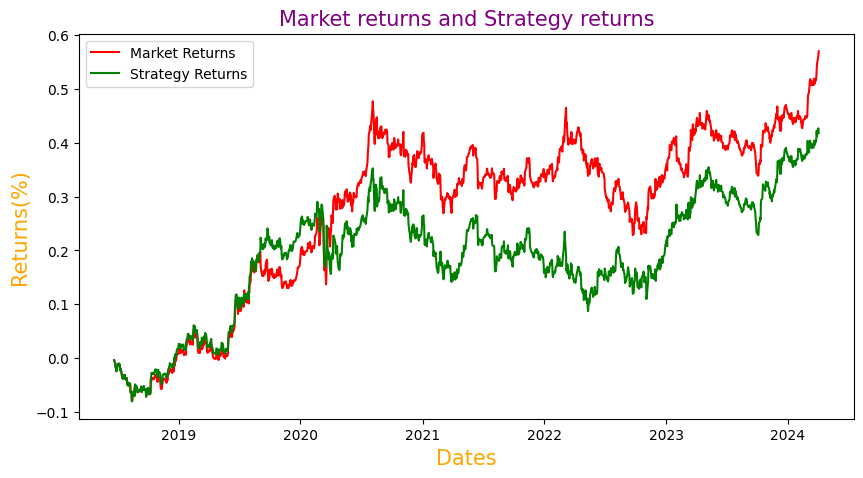

In [80]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_price_AAPL['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_price_AAPL['Cumulative Strategy Returns'], color='g', label='Strategy Returns')

plt.title('Market returns and Strategy returns', color='purple', size=15)
plt.xlabel('Dates', {'color': 'orange', 'fontsize':15})
plt.ylabel('Returns(%)', {'color': 'orange', 'fontsize':15})

plt.legend()
plt.show()